# [DL] 역전파 (강재영)

### 역전파: 순전파로 얻은 출력값과 정답과의 오차를 하나씩 층을 거슬러 올라가며 역방향으로 전파
### 전파시킨 오차에 근거하여 각 층의 가중치와 편향의 수정량을 구하고, 이를 모든 층에 대하여 수정
### -> 점차 오차를 최소화시키도록 최적화되는 학습이 진행됨

## -- 역전파 구현 (회귀) --

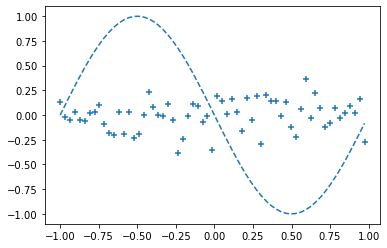

Epoch:0/2001 Error:0.28787740129498046


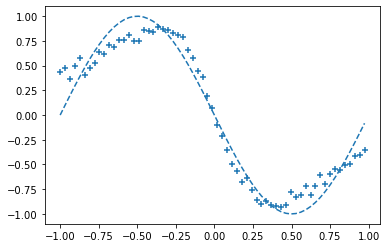

Epoch:200/2001 Error:0.011977165455365544


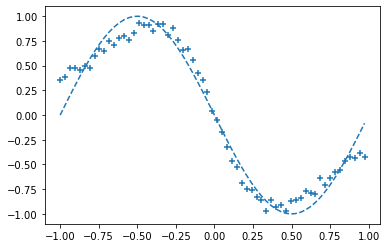

Epoch:400/2001 Error:0.008757193685111369


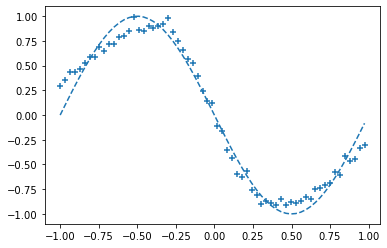

Epoch:600/2001 Error:0.006301188482152147


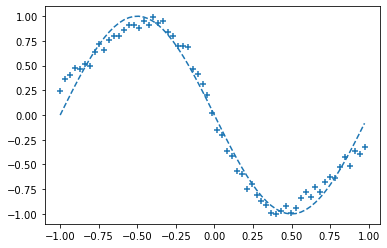

Epoch:800/2001 Error:0.005548506171009443


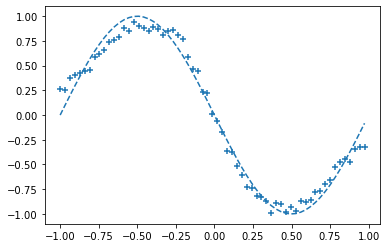

Epoch:1000/2001 Error:0.004784209968245143


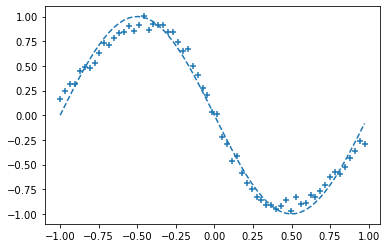

Epoch:1200/2001 Error:0.003690121869810541


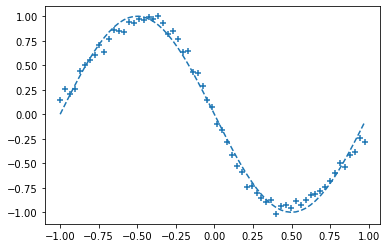

Epoch:1400/2001 Error:0.002686526823015724


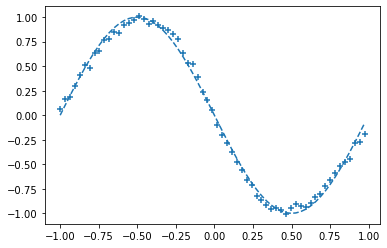

Epoch:1600/2001 Error:0.0011976026942053736


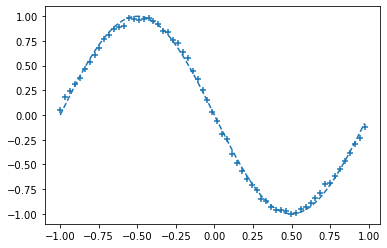

Epoch:1800/2001 Error:0.0005123408657220403


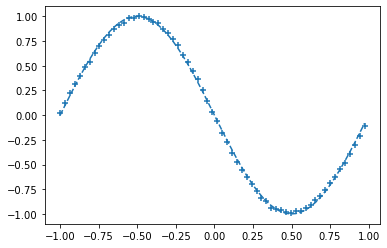

Epoch:2000/2001 Error:0.0001883632192928347


In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 입력과 정답 준비
input_data = np.arange(0, np.pi*2, 0.1)   #입력
correct_data = np.sin(input_data)   #정답
input_data = (input_data-np.pi)/np.pi   #입력을 -1 ~ 1 범위 내로 정함
n_data = len(correct_data)

# 각 설정 값
n_in = 1   # 입력층의 뉴런 수
n_mid = 3   # 은닉층의 뉴런 수
n_out = 1   # 출력층의 뉴런 수

wb_width = 0.01   # 가중치와 편향 설정을 위한 정규분포의 표준편차
eta = 0.1   # 학습률
epoch = 2001   # 반복될 학습의 수
interval = 200   # 경과 표시 간격

# 은닉층
class MiddleLayer:
    def __init__(self, n_upper, n):   # 초기 설정 (n_upper: 앞 층의 뉴런 수, n: 현재 층의 뉴런 수)
        # 가중치(행렬)와 편향(벡터)
        # randn: 지정된 인수만큼의 원소를 가진 차원의 배열을 반환
        self.w = wb_width * np.random.randn(n_upper, n)   # 가중치: n_upper * n의 행렬
        self.b = wb_width * np.random.randn(n)   # 편향: 원소 수가 n개인 벡터
        
    def forward(self, x):   # 순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))   # sigmoid 함수
        
    def backward(self, grad_y):   # 역전파
        # 정답을 인수로 취하고 delta를 통해
        # grad_w(가중치 기울기), grad_b(편향 기울기), grad_x(현 층의 입력값 기울기)를 계산
        delta = grad_y * (1-self.y)*self.y   # sigmoid 미분
        self.grad_w = np.dot(self.x.T, delta)   # 가중치 기울기
        self.grad_b = np.sum(delta, axis = 0)   # 편향 기울기
        self.grad_x = np.dot(delta, self.w.T)   # 현재 층의 입력값 기울기
        
    def update(self, eta):   # 가중치와 편향 수정
        # 각 기울기에 학습률(eta)를 곱하여 수정량 결정 후 현재값에서 뺌
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        

# 출력층
class OutputLayer:
    def __init__(self, n_upper, n):   # 초기 설정
        self.w = wb_width * np.random.randn(n_upper, n)   # 가중치
        self.b = wb_width * np.random.randn(n)   #편향
        
    def forward(self, x): # 순전파
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = u   # 항등 함수
        
    def backward(self, t):   # 역전파
            delta = self.y - t
            
            self.grad_w = np.dot(self.x.T, delta)
            self.grad_b = np.sum(delta, axis = 0)
            
            self.grad_x = np.dot(delta, self.w.T)
            
    def update(self, eta):   # 가중치와 편향 수정
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
        
# 각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# 학습
for i in range(epoch):   # 에포크 수만큼 학습 반복
    
    # 인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 결과 표시
    total_error = 0
    plot_x = []
    plot_y = []
    
    for idx in index_random:
        
        x = input_data[idx:idx+1]   # 입력
        t = correct_data[idx:idx+1]   # 정답
        
        # 순전파
        middle_layer.forward(x.reshape(1,1))   # 입력을 행렬로 변환 (배치 사이즈:1, 입력층의 뉴런 수: 1)
        output_layer.forward(middle_layer.y)
        
        # 역전파
        output_layer.backward(t.reshape(1,1))   # 정답을 행렬로 변환
        middle_layer.backward(output_layer.grad_x)
        
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            y = output_layer.y.reshape(-1)   # 행렬을 벡터로 되돌림
            
            # 오차제곱합 계산
            total_error += 1.0/2.0*np.sum(np.square(y-t))
            
            # 출력 기록
            plot_x.append(x)
            plot_y.append(y)
            
    if i%interval == 0:
        
        # 출력 그래프 표시
        plt.plot(input_data, correct_data, linestyle="dashed")
        plt.scatter(plot_x, plot_y, marker="+")
        plt.show()
        
        # 에포크 수와 오차
        print("Epoch:" + str(i) + "/" + str(epoch),
              "Error:" + str(total_error/n_data))

### 학습이 진행될수록 점들이 sine 함수에 가까워짐

## -- 역전파 구현 (분류)

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# 값
X = np.arange(-1.0, 1.1, 0.1)
Y = np.arange(-1.0, 1.1, 0.1)

# 입력, 정답 벡터 생성
input_data = []
correct_data = []
for x in X:
    for y in Y:
        input_data.append([x,y])
        if y < np.sin(np.pi * x):   # y 값이 sin 그래프 아래 있을 경우
            correct_data.append([0,1])   # 아래 영역
        else:
            correct_data.append([1,0])   # 위 영역
            
n_data = len(correct_data)   # 데이터 수

input_data = np.array(input_data)
correct_data = np.array(correct_data)

# 각 설정 값
n_in = 2   # 입력층의 뉴런 수
n_mid = 6   # 은닉층의 뉴런 수
n_out = 2   # 출력층의 뉴런 수

wb_width = 0.01   # 가중치와 편향 설정을 위한 정규분포 표준편차
eta = 0.1   # 학습률
epoch = 101   # 반복될 학습의 수
interval = 10  # 경과 표시 간격

# 은닉층
class MiddleLayer:
    def __init__(self, n_upper, n):
        # 가중치(행렬)과 편향(벡터)
        self.w = wb_width * np.random.randn(n_upper, n)
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = 1/(1+np.exp(-u))   # sigmoid 함수
        
    def backward(self, grad_y):
        delta = grad_y * (1-self.y)*self.y
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis = 0)
        
        self.grad_x = np.np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# 출력층
class OutputLayer:
    def __init__(self, n_upper, n):
        self.w = wb_width * np.random.randn(n_upper, n)   # 가중치
        self.b = wb_width * np.random.randn(n)
        
    def forward(self, x):
        self.x = x
        u = np.dot(x, self.w) + self.b
        self.y = np.exp(u)/np.sum(np.exp(u), axis=1, keepdims=True)   # 소프트맥스 함수
        
    def backward(self, t):
        delta = self.y - t
        
        self.grad_w = np.dot(self.x.T, delta)
        self.grad_b = np.sum(delta, axis=0)
        
        self.grad_x = np.dot(delta, self.w.T)
        
    def update(self, eta):
        self.w -= eta * self.grad_w
        self.b -= eta * self.grad_b
        
# 각 층의 초기화
middle_layer = MiddleLayer(n_in, n_mid)
output_layer = OutputLayer(n_mid, n_out)

# 학습
sin_data = np.sin(np.pi * X)   # 결과 검증용
for i in range(epoch):
    
    # 인덱스 임의 섞기
    index_random = np.arange(n_data)
    np.random.shuffle(index_random)
    
    # 결과 표시용
    total_error = 0
    x_1 = []
    y_1 = []
    x_2 = []
    y_2 = []
    
    for idx in index_random:
        
        x = input_data[idx]
        t = correct_data[idx]
        
        # 순전파
        middle_layer.forward(x.reshape(1,2))
        output_layer.forward(middle_layer.y)
        
        # 역전파
        output_layer.backward(t.reshape(1,2))
        middle_layer.backward(output_layer.grad_x)
        
        # 가중치와 편향 수정
        middle_layer.update(eta)
        output_layer.update(eta)
        
        if i%interval == 0:
            
            y = output_layer.y.reshape(-1)   # 행렬을 벡터로 되돌림
            
            # cross entropy 오차
            total_error += - np.sum(t * np.log(y + 1e-7))
            
            # 확률 크기를 비교하여 분류
            if y[0] > y[1]:
                x_1.append(x[0])
                y_1.append(x[1])
            else:
                x_2.append(x[0])
                y_2.append(x[1])
                
        if i%interval == 0:
            
            # 출력 그래프 표시
            plt.plot(X, sin_data, linestyle="dashed")
            plt.scatter(x_1, y_1, marker="+")
            plt.scatter(x_2, y_2, marker="x")
            plt.show()
            
            # 에포크 수와 오차
            print("Epoch:" + str(i) + "/" + str(epoch),
                 "Error:" + str(total_error/n_data))

AttributeError: module 'numpy' has no attribute 'np'

In [19]:
pip install numpy --upgrade

Note: you may need to restart the kernel to use updated packages.


파일 이름, 디렉터리 이름 또는 볼륨 레이블 구문이 잘못되었습니다.
